# Ultimate Data Science Challenge<a id='Ultimate'></a>

## Contents<a id='Contents'></a>
* [Ultimate Data Science Challenge](#Ultimate)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Part 1: Data Wrangling and EDA](#DataEDA)
      * [Problem](#Problem)
      * [Load the Data](#Load_the_Data)
      * [Data Wrangling](#Data_Wrangling)
      * [Exploratory Data Analysis](#EDA)
      * [Summary](#Summary)
  * [Part 2: Experiment and Metrics Design](#EMD)
      * [Question 1](#Q1)
      * [Question 2](#Q2)
  * [Part 3: Predictive Modeling](#PM)
      * [Problem](#Problem3)
      * [Load the Data](#Load_the_Data3)
      * [Data Wrangling](#Data_Wrangling3)
      * [Exploratory Data Analysis](#EDA3)
      * [Modeling](#Model3)
      * [Conclusions](#Con3)

## Introduction<a id='Introduction'></a>

This data science challenge consists of three different parts focusing on exploratory data analysis, experiment and metrics design, and predictive modeling, respectively.

## Imports<a id='Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from dateutil import relativedelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

C:\Users\jmhat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jmhat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Part 1: Data Wrangling and EDA<a id='DataEDA'></a>

### Problem<a id='Problem'></a>

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

### Load the Data<a id='Load_the_Data'></a>

In [2]:
logins = pd.read_json('C:/Users/jmhat/Desktop/Coding/Ultimate Challenge/Data/logins.json')

### Data Wrangling<a id='Data_Wrangling'></a>

In [3]:
logins

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
logins['login_time'] = pd.to_datetime(logins['login_time'])

Determine the number of logins for every 15 minute increment in the dataframe.

In [6]:
logins.set_index('login_time', inplace=True)

In [7]:
logins['count'] = 1

In [8]:
logins_15 = logins.resample('15min').sum()

In [9]:
logins_15

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [10]:
logins_15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


### Exploratory Data Analysis<a id='EDA'></a>

Text(0, 0.5, 'Counts per 15 minutes')

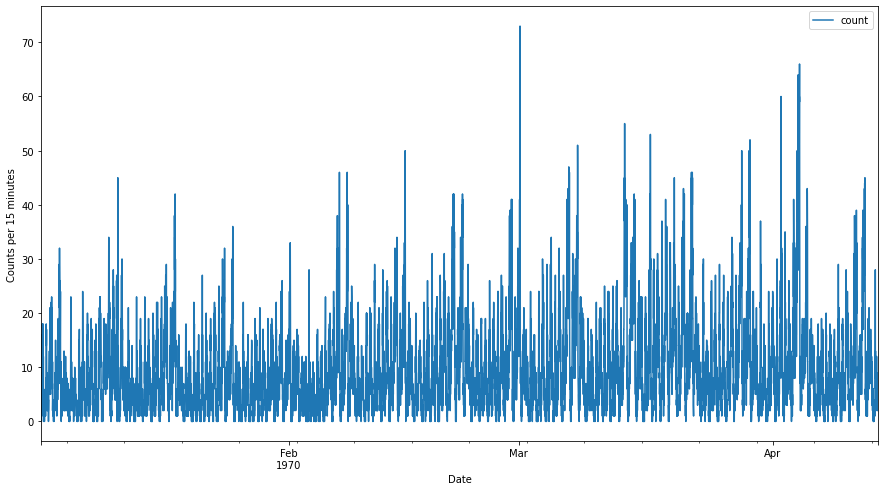

In [11]:
logins_15.plot(kind='line', figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel('Counts per 15 minutes')

From the initial plot, it seems like there is definitely a repeating pattern to the number of dates per 15 minutes every month. In order to analyze this further, I should also look into seasonality. 

Text(0, 0.5, 'Counts per 15 minutes')

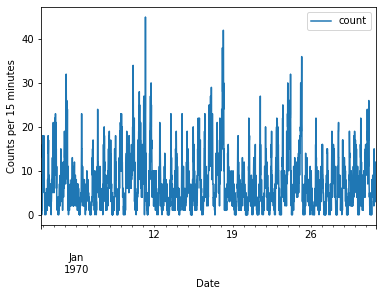

In [12]:
logins_15.loc[pd.to_datetime('1970-01-01 20:00:00'):pd.to_datetime('1970-01-31 20:00:00')].plot(y='count')
plt.xlabel('Date')
plt.ylabel('Counts per 15 minutes')

Looking at just one month of data, it seems like there is a repeated trend about 4 times every month.

Text(0, 0.5, 'Counts per 15 minutes')

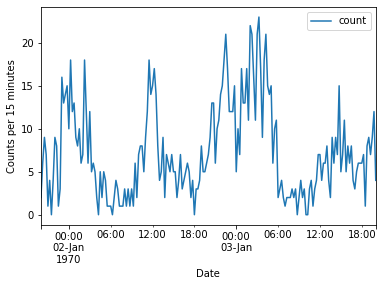

In [13]:
logins_15.loc[pd.to_datetime('1970-01-01 20:00:00'):pd.to_datetime('1970-01-03 20:00:00')].plot(y='count')
plt.xlabel('Date')
plt.ylabel('Counts per 15 minutes')

Looking at just a few days, it is also interesting to note spikes around midnight and noon. This may indicate some seasonality down to the hourly level. I'll now look into determining seasonality using the Dickey Fuller test. I'll first create an approximate 12 day rolling mean and standard deviation.

In [14]:
rolling_mean = logins_15.rolling(1000).mean()
rolling_std = logins_15.rolling(1000).std()

I'll then plot the rolling mean and standard deviation against the original dataset.

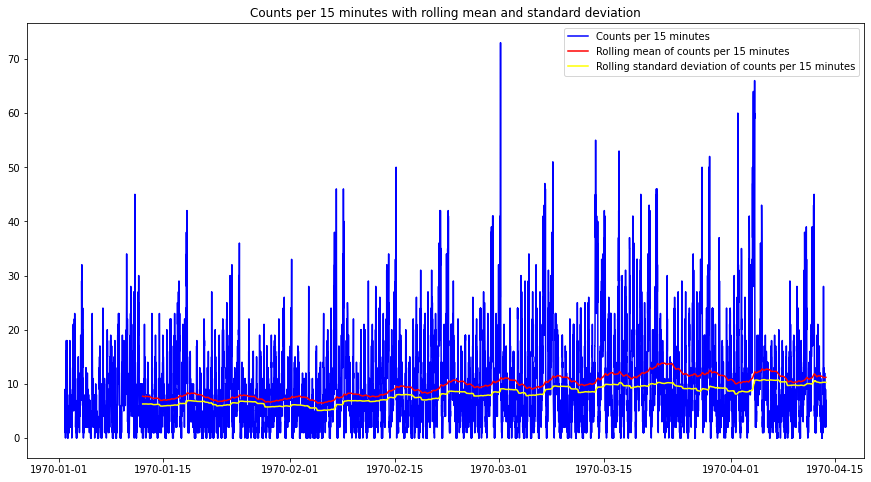

In [15]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)

plt.plot(logins_15, color='blue', label='Counts per 15 minutes')
plt.plot(rolling_mean, color='red', label='Rolling mean of counts per 15 minutes')
plt.plot(rolling_std, color='yellow', label='Rolling standard deviation of counts per 15 minutes')
plt.title('Counts per 15 minutes with rolling mean and standard deviation')
plt.legend(loc='best')

In [16]:
adft = adfuller(logins_15, autolag='AIC')

In [17]:
adft_output = pd.DataFrame({'Values':[adft[0],adft[1],adft[2],adft[3],adft[4]['1%'],adft[4]['5%'],adft[4]['10%']],'Metric':['Test Statistic','p-value','No. of lags used','No. of observations used','critical value (1%)','critical value (5%)','critical value (10%)']})
print(adft_output)

         Values                    Metric
0 -1.033795e+01            Test Statistic
1  2.732397e-18                   p-value
2  3.800000e+01          No. of lags used
3  9.749000e+03  No. of observations used
4 -3.431021e+00       critical value (1%)
5 -2.861837e+00       critical value (5%)
6 -2.566928e+00      critical value (10%)


Since our p-value is less than 5 percent, and the test statistic is also less than any of the critical values, we can positively conclude that the data is stationary. Let's now check for autocorrelation in the time series.

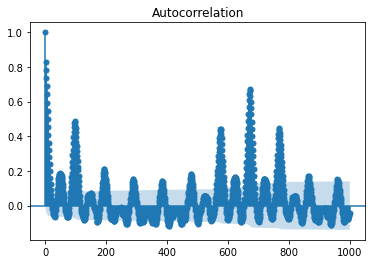

In [18]:
#Plot the autocorrelation function
figure = tsaplots.plot_acf(logins_15['count'], lags=1000)
plt.show()

The autocorrelation function plot is difficult to decipher as our base unit of time is 15 minute intervals which are relatively small. Let's now decompose the time series to visualize any trends in seasonality.

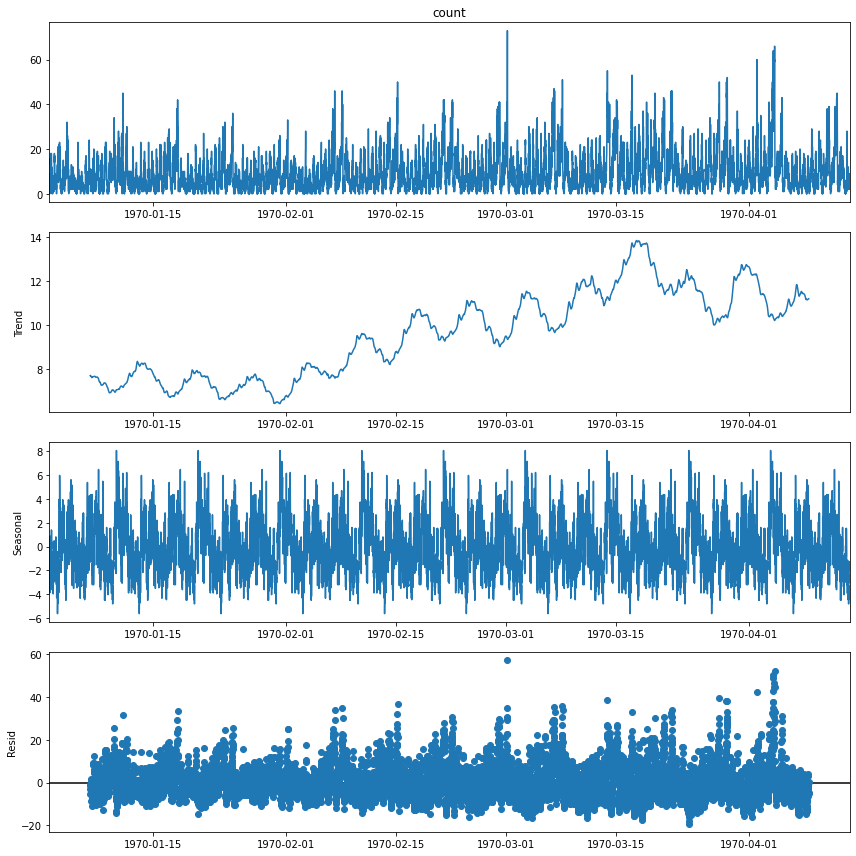

In [19]:
decomp = seasonal_decompose(logins_15['count'], model='additive', period=1000)
fig = decomp.plot()
fig.set_size_inches((12, 12))
fig.tight_layout()
plt.show()

### Summary<a id='Summary'></a>

After conducting exploratory data analysis, I found that we had a p-value less than 5 percent and a test statistic less than any of the critical values. This would mean the data is stationary. However, we can also see in the seasonal decomposition that the number of logins every 15 minutes seems to increase over time, which may be contrary to stationarity. The autocorrelation function didn't seem to show any useful information, as it fluxuates wildly over lags. Overall, I was able to determine some seasonality to this data and decompose the values to adequately describe this dataset.

## Part 2: Experiment and Metrics Design<a id='EMD'></a>

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

### Question 1<a id='Q1'></a>

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

For this experiment, a success metric would definitely depend on what we want to see for driver engagement. For weekdays, since each city has a distinct activity time, I would say that not many drivers would want to be active for both cities most active periods. This would essentially entail quasi 24 hour shifts, which would be unsafe and unsustainable. However, there could be the possibly of some drivers potentially splitting the difference by driving the last 4 hours of the night in Gotham and the first 4 hours of the day in Metropolis. The best time to track drivers would then be most likely on the weekends. I would use the total amount of time drivers spend in each city as a metric of success for this experiment. This would be best as we are looking for not only how many times they cross back and forth, but also the amount of time they spend mingling between both cities.

### Question 2<a id='Q2'></a>

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Explain how you will implement the experiment, what statistical test(s) you will conduct to verify the significance of the observation, and how you would interpret the results and provide recommendations to the city operations team along with any caveats.

In order to determine the amount of time that drivers spend in each city, we need to first have a sufficient sample size. In order to effectively determine whether there is more driver participation between the cities, we should create two groups of samples. Each sample should be comprised of at least 10% of the population of drivers from each city, although more would help the analysis. For this test, we would also need a control sample. This control should be sampled before the tolls are reimbursed as to get a good idea of how many drivers are willing to pay the toll and drive between both cities on the weekends. Once this baseline is taken, the city managers should then begin reimbursing tolls and again sample those same populations on the weekends. This should give a great indication of how much time drivers are spending in the opposite cities. Of course, there could also be other factors we need to take into consideration with this test. Things like high attendance events like sports games or concerts in either city could skew the results as more riders would be willing to pay tolls for the increase in ridership. We would therefore need to conduct this test during a more "typical" driving week as to solely isolate the toll fare as the only variable in the test. In order to determine if the reimbursement was effective, we will compare the means between the each of the two populations of drivers from the cities. This would indicate we need to run a T-test, specifically a paired sample T-test since both measurements are on the same subgroups, much like samples patients before and after treatment. For this, the null hypothesis would be that the pairwise difference between the means before and after the reimbursements are initiated would be zero, or no change. We would compare this value to the T-value tables as well as the p-value to determine if we can accept or reject the null hypothesis. If we have correctly isolated the toll as the only variable of interest, this test should be able to help the city managers determine if the toll reimbursement was effective at integrating drivers from both cities. If we accept the null hypothesis, then we can conclude that the reimbursement did not effect driver decisions to work in both cities.

## Part 3: Predictive Modeling<a id='PM'></a>

### Problem<a id='Problem3'></a>

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

### Load the Data<a id='Load_the_Data3'></a>

In [20]:
ultimate = pd.read_json('C:/Users/jmhat/Desktop/Coding/Ultimate Challenge/Data/ultimate_data_challenge.json')

### Data Wrangling<a id='Data_Wrangling3'></a>

In [21]:
ultimate

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [22]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Let's deal with the missing values before exploring the data. I'll first work on the phone column and most likely just drop the missing values for time's sake. If I were to spend more time on the analysis, I would likely try to fill the missing values with a randomly selected value from the column while keeping the percentage of iPhones and Android phones constant.

In [23]:
ultimate['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [24]:
#Percentage iPhone
iphone = (34582/49604)*100
print('iPhones hold', iphone, '% of the dataset')
#Percentage Android
android = (15022/49604)*100
print('Android holds', android, '% of the dataset')

iPhones hold 69.71615192323199 % of the dataset
Android holds 30.283848076768006 % of the dataset


In [25]:
ultimate.dropna(subset=['phone'], inplace=True)

In [26]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    41578 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49406 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


The only columns with missing values are now average rating by the driver and average rating of the driver. To fill these values, I will just use the mean of each of these columns.

In [27]:
#Mean driver rating by passenger
rd_avg = round(ultimate['avg_rating_of_driver'].mean(), 1)
#Mean passenger rating by driver
rp_avg = round(ultimate['avg_rating_by_driver'].mean(), 1)

In [28]:
ultimate['avg_rating_of_driver'] = ultimate['avg_rating_of_driver'].fillna(rd_avg)
ultimate['avg_rating_by_driver'] = ultimate['avg_rating_by_driver'].fillna(rp_avg)

In [29]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


I now want to change the date columns to datetime objects, encode the phone column, encode true/false values, and encode the city names.

In [30]:
ultimate['signup_date'] =  pd.to_datetime(ultimate['signup_date'])

In [31]:
ultimate['last_trip_date'] = pd.to_datetime(ultimate['last_trip_date'])

In [32]:
ultimate = pd.get_dummies(ultimate, columns=['phone'], drop_first=False)

In [33]:
ultimate['ultimate_black_user'] = ultimate['ultimate_black_user'].astype(int)

In [34]:
ultimate = pd.get_dummies(ultimate, columns=['city'], drop_first=False)

In [35]:
ultimate

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,0,1,0,1,0
49996,1,2014-01-24,4.6,1.00,2014-01-25,0.0,0,0.0,0.00,4.0,0,1,1,0,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,1,0,0,0,1
49998,2,2014-01-14,3.0,1.00,2014-01-15,0.0,0,100.0,4.58,3.5,0,1,1,0,0


For a user to be retained, they need to be active in the preceding 30 days from when the data was extracted. We can find the extraction date by looking for the latest date in the last trip date column. We can then subtract 30 days from that and check which users had their lastest rides within that timeframe.

In [36]:
extracted = ultimate['last_trip_date'].max()

In [37]:
ultimate['retained'] = ultimate['last_trip_date'].apply(lambda x: 1 if (extracted - x).days <= 30 else 0)

In [38]:
ultimate

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,retained
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,1,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,1,0,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,0,1,0,1,0,1
49996,1,2014-01-24,4.6,1.00,2014-01-25,0.0,0,0.0,0.00,4.0,0,1,1,0,0,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,1,0,0,0,1,0
49998,2,2014-01-14,3.0,1.00,2014-01-15,0.0,0,100.0,4.58,3.5,0,1,1,0,0,0


### Exploratory Data Analysis<a id='EDA3'></a>

Now, I can explore the data by looking at some summary statistics and visualizations.

In [39]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,retained
count,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,2.277256,4.601230,1.074991,8.875314,0.375212,60.883832,5.785418,4.777949,0.302838,0.697162,0.330881,0.202927,0.466192,0.376401
std,3.793300,0.565228,0.222666,19.989018,0.484182,37.086239,5.669709,0.446223,0.459491,0.459491,0.470535,0.402183,0.498861,0.484487
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,0.000000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.700000,1.000000,0.000000,0.000000,66.700000,3.880000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,5.000000,1.050000,8.700000,1.000000,100.000000,6.930000,5.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,1.000000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'trips_in_first_30_days'}>,
        <AxesSubplot:title={'center':'signup_date'}>,
        <AxesSubplot:title={'center':'avg_rating_of_driver'}>,
        <AxesSubplot:title={'center':'avg_surge'}>],
       [<AxesSubplot:title={'center':'last_trip_date'}>,
        <AxesSubplot:title={'center':'surge_pct'}>,
        <AxesSubplot:title={'center':'ultimate_black_user'}>,
        <AxesSubplot:title={'center':'weekday_pct'}>],
       [<AxesSubplot:title={'center':'avg_dist'}>,
        <AxesSubplot:title={'center':'avg_rating_by_driver'}>,
        <AxesSubplot:title={'center':'phone_Android'}>,
        <AxesSubplot:title={'center':'phone_iPhone'}>],
       [<AxesSubplot:title={'center':'city_Astapor'}>,
        <AxesSubplot:title={'center':"city_King's Landing"}>,
        <AxesSubplot:title={'center':'city_Winterfell'}>,
        <AxesSubplot:title={'center':'retained'}>]], dtype=object)

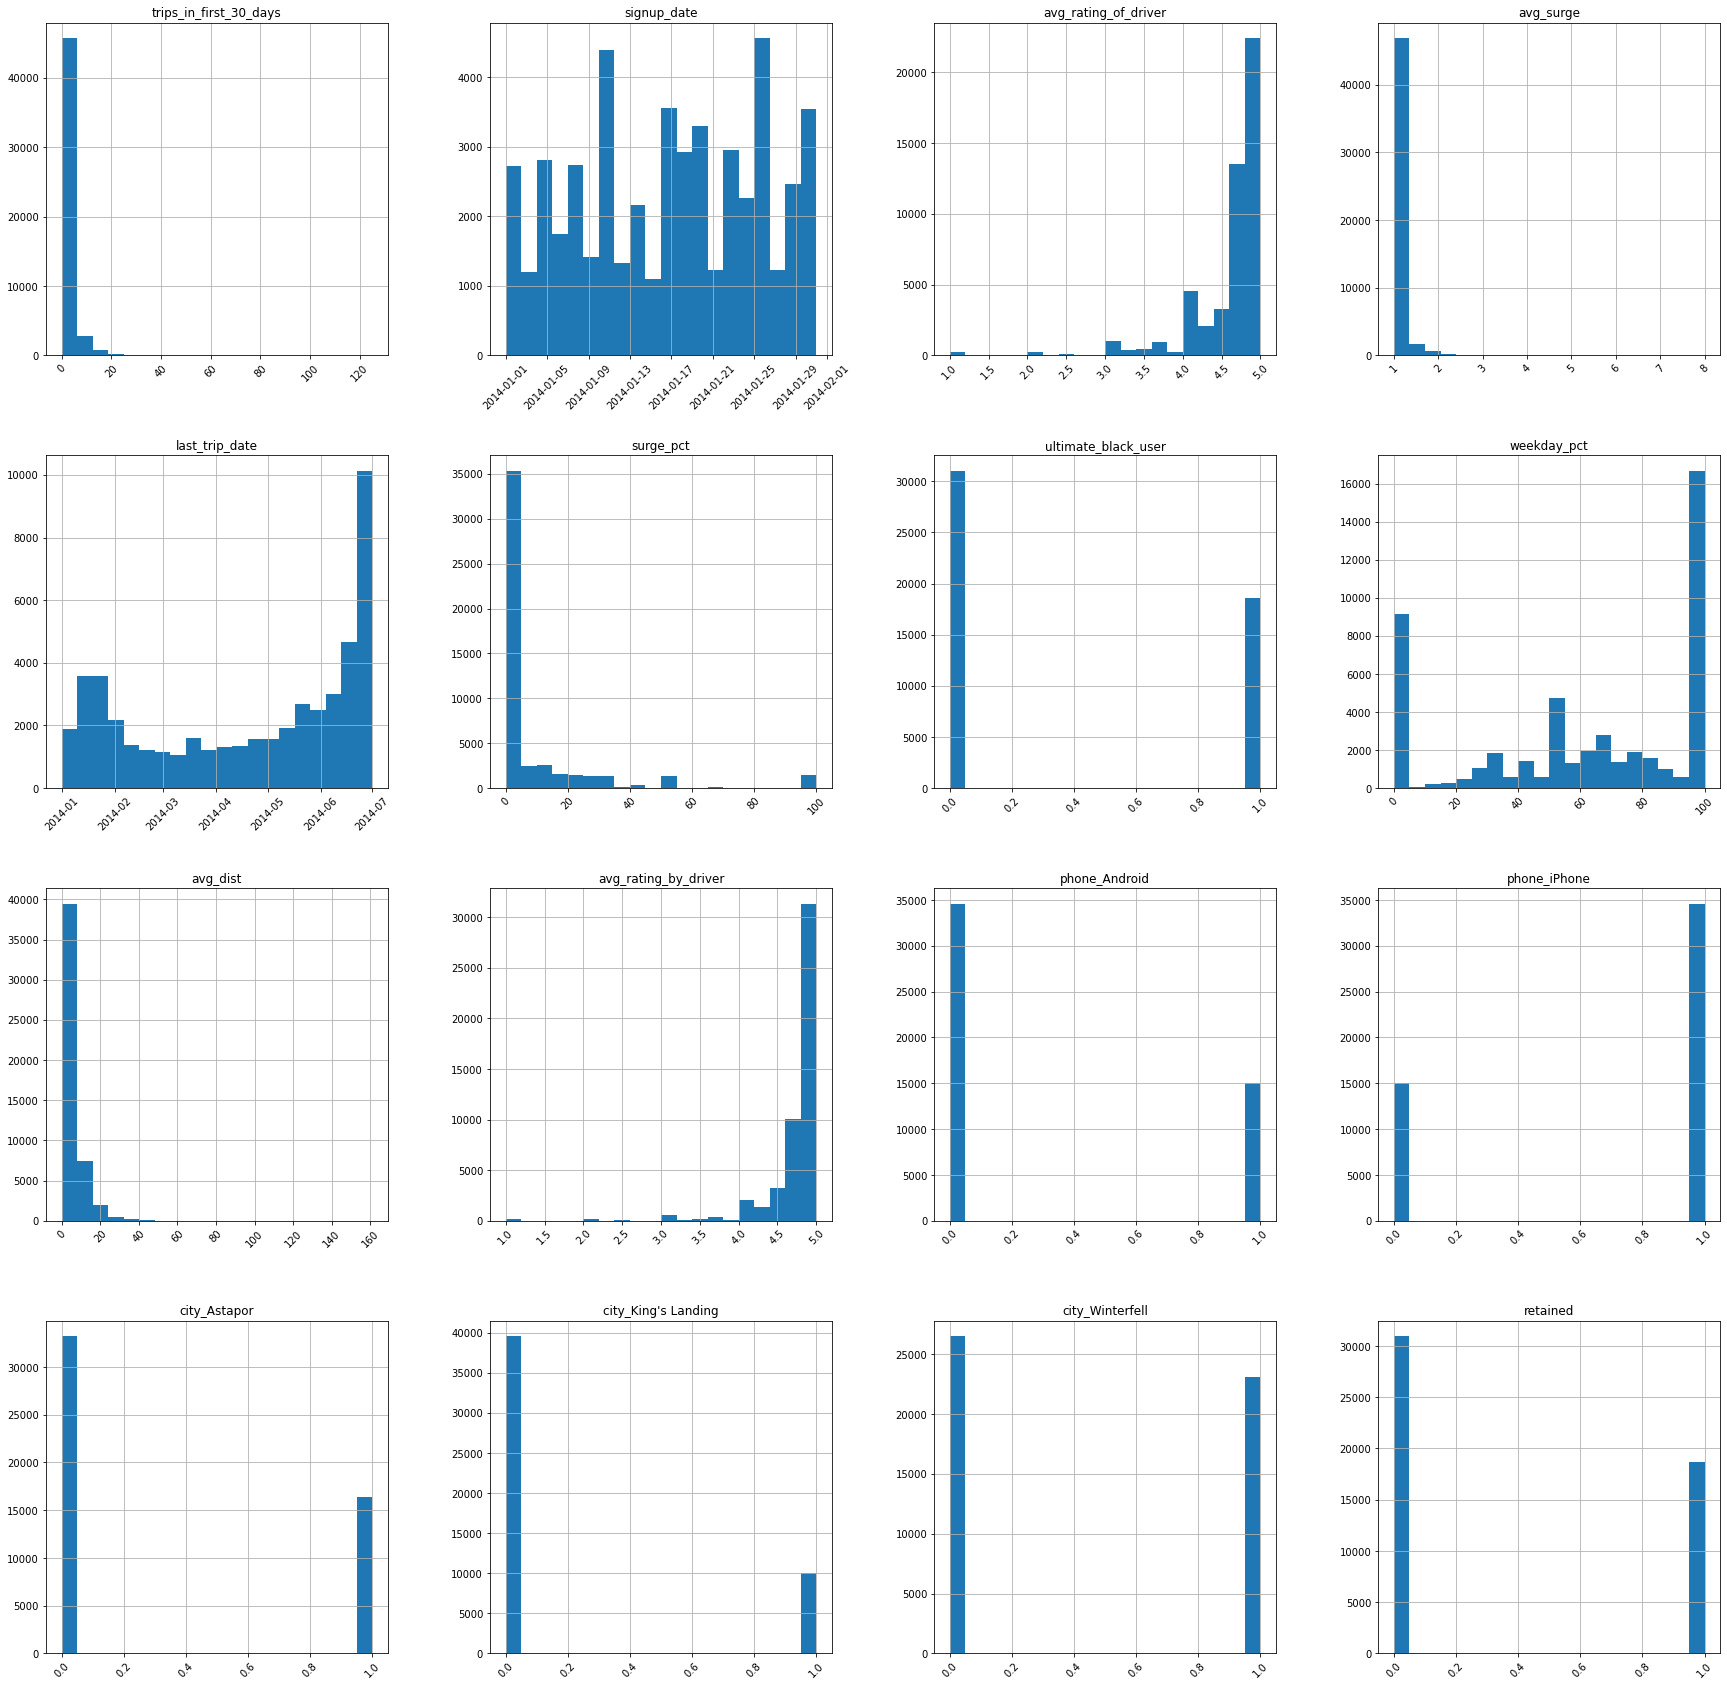

In [40]:
ultimate.hist(bins=20, figsize=(30,30), xrot=45)

Text(0, 0.5, 'Count')

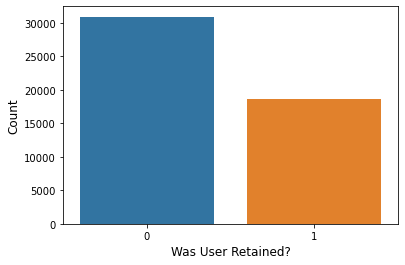

In [41]:
#Retained Users
sns.countplot(x = 'retained', data=ultimate)
plt.xlabel('Was User Retained?', size=12)
plt.ylabel('Count', size=12)

In [42]:
ultimate['retained'].value_counts()

0    30933
1    18671
Name: retained, dtype: int64

Question 1: Of the 49,604 users, only 18,671 were retained or in percentages, only about 38% of users. This does seem quite low for any type of retention problem. From the EDA, most users are from Winterfell and use an iPhone. Signup trends were also interesting with spikes appearing at semi-normal intervals in the timeseries. Most of the continuous variables were either left or right skewed, with the last trip date being skewed towards both the start and end of the timeseries data.

### Modeling<a id='Model3'></a>

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In order to build a model for this scenario, I need to have a column for users who are active 6 months after signing up. To do this, I need to compare retained dates with when they first signed up for the service. If they are retained at 6 months of signing up, I will give the user a value of 1, if not, 0. The last date of the timeseries is July 1st, 2014. I'll be using this value as well as the signup date and the retained column.

In [43]:
r_6 = []

In [44]:
def months(x, y):
    finish = x.dt.to_period('M').view(dtype='int64')
    start = y.dt.to_period('M').view(dtype='int64')
    return finish-start

In [45]:
ultimate['months'] = months(ultimate['last_trip_date'],ultimate['signup_date'])

In [46]:
for index, row in ultimate.iterrows():
    if ultimate['retained'][index] == 1 and ultimate['months'][index] == 6:
        r_6.append(1)
    else:
        r_6.append(0)

In [47]:
ultimate['retained_6month'] = r_6

In [48]:
ultimate

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,retained,months,retained_6month
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,1,0,1,5,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,1,0,0,0,4,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,1,0,0,0,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,1,0,1,5,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1,0,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,0,1,0,1,0,1,5,0
49996,1,2014-01-24,4.6,1.00,2014-01-25,0.0,0,0.0,0.00,4.0,0,1,1,0,0,0,0,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,1,0,0,0,1,0,4,0
49998,2,2014-01-14,3.0,1.00,2014-01-15,0.0,0,100.0,4.58,3.5,0,1,1,0,0,0,0,0


In [49]:
ultimate['retained_6month'].value_counts()

0    49059
1      545
Name: retained_6month, dtype: int64

This shows that there are 545 users who are active at the 6 month mark after signing up for the service. I can now use this as the target variable and implement a machine learning model. My concern for this data is that it appears to be highly skewed towards one class. I'll also need to see if any of these variables are correlated to the 6 month retention. Since 6 month retention is binary and we have both continuous and binary features, I will use Point Biserial method for comparison between binary and continuous variables and Pearson for features that are both binary.

In [50]:
#Correlation between 6 month retention and trips in the first 30 days
print(stats.pointbiserialr(ultimate['retained_6month'], ultimate['trips_in_first_30_days']))

PointbiserialrResult(correlation=0.0829448105846813, pvalue=1.8867716582307552e-76)


In [51]:
#Correlation between 6 month retention and average ratings of drivers
print(stats.pointbiserialr(ultimate['retained_6month'], ultimate['avg_rating_of_driver']))

PointbiserialrResult(correlation=0.0064427138101741605, pvalue=0.15131642772005893)


In [52]:
#Correlation between 6 month retention and average surge
print(stats.pointbiserialr(ultimate['retained_6month'], ultimate['avg_surge']))

PointbiserialrResult(correlation=0.001337607144599873, pvalue=0.7657765163846519)


In [53]:
#Correlation between 6 month retention and surge percent
print(stats.pointbiserialr(ultimate['retained_6month'], ultimate['surge_pct']))

PointbiserialrResult(correlation=0.007210400867846601, pvalue=0.10830078984966438)


In [54]:
#Correlation between 6 month retention and weekday percent
print(stats.pointbiserialr(ultimate['retained_6month'], ultimate['weekday_pct']))

PointbiserialrResult(correlation=0.02804501774841089, pvalue=4.17755135117893e-10)


In [55]:
#Correlation between 6 month retention and average distance
print(stats.pointbiserialr(ultimate['retained_6month'], ultimate['avg_dist']))

PointbiserialrResult(correlation=-0.029874276406068913, pvalue=2.834867923858005e-11)


In [56]:
#Correlation between 6 month retention and ultimate black users
print(stats.pearsonr(ultimate['retained_6month'], ultimate['ultimate_black_user']))

(0.028562903174902746, 1.9829601825460549e-10)


In [57]:
#Correlation between 6 month retention and iPhone users
print(stats.pearsonr(ultimate['retained_6month'], ultimate['phone_iPhone']))

(0.03242841672414743, 5.042073738825559e-13)


In [58]:
#Correlation between 6 month retention and Android users
print(stats.pearsonr(ultimate['retained_6month'], ultimate['phone_Android']))

(-0.03242841672414743, 5.042073738825559e-13)


In [59]:
#Correlation between 6 month retention and the City of Astapor
print(stats.pearsonr(ultimate['retained_6month'], ultimate['city_Astapor']))

(-0.033427604549692506, 9.557741669724556e-14)


In [60]:
#Correlation between 6 month retention and the City of King's Landing
print(stats.pearsonr(ultimate['retained_6month'], ultimate["city_King's Landing"]))

(0.043472461166128094, 3.4411188583477575e-22)


In [61]:
#Correlation between 6 month retention and the City of Winterfell
print(stats.pearsonr(ultimate['retained_6month'], ultimate["city_Winterfell"]))

(-0.0035180594424494838, 0.4333198700740761)


In [62]:
#Correlation between 6 month retention and whether they are retained
print(stats.pearsonr(ultimate['retained_6month'], ultimate['retained']))

(0.13566447443984503, 2.1717495646579613e-202)


Based on this analysis, there are a few features that have both positive and negative correlations with 6 month retention. I based this off of features with a p-value less than 0.05. The highest positive correlation was 0.14 with the normal retention column. The highest negative retention was -0.03 with the city of Astapor.

In [63]:
ultimate

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell,retained,months,retained_6month
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,0,1,0,1,0,1,5,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,1,0,1,0,0,0,4,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,1,0,0,0,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,0,1,0,1,0,1,5,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,1,0,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,2014-01-25,5.0,1.00,2014-06-05,0.0,0,100.0,5.63,4.2,0,1,0,1,0,1,5,0
49996,1,2014-01-24,4.6,1.00,2014-01-25,0.0,0,0.0,0.00,4.0,0,1,1,0,0,0,0,0
49997,0,2014-01-31,5.0,1.00,2014-05-22,0.0,1,100.0,3.86,5.0,1,0,0,0,1,0,4,0
49998,2,2014-01-14,3.0,1.00,2014-01-15,0.0,0,100.0,4.58,3.5,0,1,1,0,0,0,0,0


In [64]:
#Split the data into training and testing sections
X = ultimate.drop(columns=['months', 'retained_6month', 'last_trip_date', 'signup_date'])
y = ultimate['retained_6month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [76]:
#Random Forest Model
clf = RandomForestClassifier(n_estimators=200, min_samples_split=300, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.808789436548735


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89      9812
           1       0.05      0.83      0.09       109

    accuracy                           0.81      9921
   macro avg       0.52      0.82      0.49      9921
weighted avg       0.99      0.81      0.88      9921



In [67]:
rf = RandomForestClassifier()
baseline_model_cv = cross_validate(rf, X_train, y_train, cv=5, n_jobs=-1, scoring='recall')
print(f"{baseline_model_cv['test_score'].mean():.3f} +/- {baseline_model_cv['test_score'].std():.3f}")

0.000 +/- 0.000


In [114]:
# Train the balanced random forest model
brf = BalancedRandomForestClassifier(random_state=42)
brf_model_cv = cross_validate(brf, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")
# Check the model performance
print(f"{brf_model_cv['test_score'].mean():.3f} +/- {brf_model_cv['test_score'].std():.3f}")

0.931 +/- 0.031


In [115]:
# Train the random under-sampling boosting classifier model
rusb = RUSBoostClassifier(random_state=42)
rusb_model_cv = cross_validate(rusb, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")
# Check the model performance
print(f"{rusb_model_cv['test_score'].mean():.3f} +/- {rusb_model_cv['test_score'].std():.3f}")

0.775 +/- 0.230


In [116]:
# Train the easy ensemble classifier model
eec = EasyEnsembleClassifier(random_state=42)
eec_model_cv = cross_validate(eec, X_train, y_train, cv = 5, n_jobs = -1, scoring="recall")
# Check the model performance
print(f"{eec_model_cv['test_score'].mean():.3f} +/- {eec_model_cv['test_score'].std():.3f}")

0.956 +/- 0.017


In [118]:
eec = EasyEnsembleClassifier(random_state=42)
eec_model = eec.fit(X_train, y_train)
y_pred = eec_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84      9812
           1       0.04      0.97      0.07       109

    accuracy                           0.72      9921
   macro avg       0.52      0.85      0.45      9921
weighted avg       0.99      0.72      0.83      9921



### Conclusions<a id='Con3'></a>

I choose to try a few difference classifier models in order to determine which one would work the best with the dataset. The random forest classifier was the most robust of the models I choose. I also chose to look at a random under-sampling boosted classifier and an Easy Ensemble classifier to try and take into account the major class imbalance between those who were retained after 6 months and those who weren't. I initially graded my models based on their mean accuracy and standard deviation scores. Those with the highest scores I created classification reports for to further analyze the results. From the initial results. The random forest classifier and the easy ensemble classifer had the closest results. On further inspection, both models had a difficult time predicting retained riders, most likely because the dataset was highly skewed towards non-retained riders, especially after 6 months. I applied stratification to the train/test split as well as a high minium sample split in the random forest model to account for this and it did slightly better than the easy ensemble model. The random forest model was about 72% accurate with vastly different precision scores depending on the target and more similar recall scores. From my correlation analysis, it appears that the best predictor for 6 month retention is if a driver is classified as being normally retained. The city of Astapor had the highest negative correlation with retention, maybe inferring that users are not well retained from this city. Further analysis would be needed to determine why those riders chose not to continue with the service. In order to improve this analysis, I would recommend that the company increase the sample size to ensure there is a more equal distribution between retained and not retained. I would recommend more advanced processing as well for the future, maybe taking samples from the two groups, such that we have two fairly equal sample sizes. 